In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\geeze\Downloads\Data Analytics Internship by Elevvo Pathways\Level_2\Task_4_Data_Cleaning_&_Insight_Generation_from_Survey\kaggle_survey_2017_2021.csv\kaggle_survey_2017_2021.csv", skiprows=1)
print(f"Dataset shape: {df.shape}")

# First, let's print the first few rows to see the actual column names
print("\nFirst few columns:")
print(df.columns.tolist()[:10])

# Function to find column by keywords
def find_column(df, keywords):
    for col in df.columns:
        if all(keyword.lower() in col.lower() for keyword in keywords):
            return col
    return None

# Find our key columns
age_col = find_column(df, ['age', 'years'])
gender_col = find_column(df, ['gender', 'selected'])
country_col = find_column(df, ['country', 'reside'])

print(f"\nIdentified columns:")
print(f"Age column: {age_col}")
print(f"Gender column: {gender_col}")
print(f"Country column: {country_col}")

# Verify we found all columns
if None in [age_col, gender_col, country_col]:
    raise ValueError("Could not find one or more required columns")



C:\Users\geeze\AppData\Local\Temp\ipykernel_9752\974406512.py:7: DtypeWarning: Columns (8,9,10,11,12,13,14,15,16,17,18,20,22,23,24,25,26,27,28,29,30,32,33,34,35,36,37,38,39,40,41,42,43,44,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,82,83,84,85,86,87,88,89,90,91,92,94,95,96,97,98,99,101,102,103,104,105,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,152,153,154,155,156,157,158,159,160,161,162,163,164,165,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,239,240,241,242,243,244,245,246,247,248,249,250,251,252,254,255,256,257,258,259,260,261,262,263,264,265,266,268,269,270,271,272

Dataset shape: (106301, 293)

First few columns:
['Year', 'Duration (in seconds)', 'What is your age (# years)?', 'What is your gender? - Selected Choice', 'In which country do you currently reside?', 'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?', 'Select the title most similar to your current role (or most recent title if retired): - Selected Choice', 'For how many years have you been writing code and/or programming?', 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python', 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R']

Identified columns:
Age column: What is your age (# years)?
Gender column: What is your gender? - Selected Choice
Country column: In which country do you currently reside?


In [5]:
# Now proceed with cleaning
# First rename our key columns to simpler names before cleaning all columns
df = df.rename(columns={
    age_col: 'age',
    gender_col: 'gender',
    country_col: 'country'
})

# Now clean all other column names
df.columns = [col.lower().strip().replace(' ', '_').replace('?', '').replace('-', '_') 
              for col in df.columns]

# Identify columns with high percentage of missing values
missing_percent = df.isnull().mean().sort_values(ascending=False)
columns_to_drop = missing_percent[missing_percent > 0.7].index
df = df.drop(columns=columns_to_drop)

# Drop rows missing critical demographic information
df = df.dropna(subset=['age', 'gender', 'country'])

# Age and gender analysis
age_order = [
    '18-21', '22-24', '25-29', '30-34', '35-39', 
    '40-44', '45-49', '50-54', '55-59', '60-69', '70+'
]



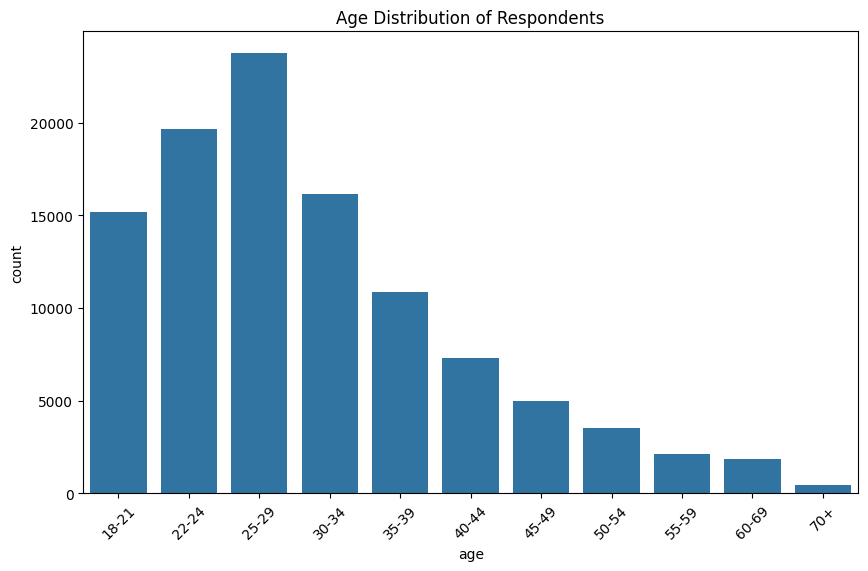

In [6]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='age', order=age_order)
plt.title('Age Distribution of Respondents')
plt.xticks(rotation=45)
plt.show()



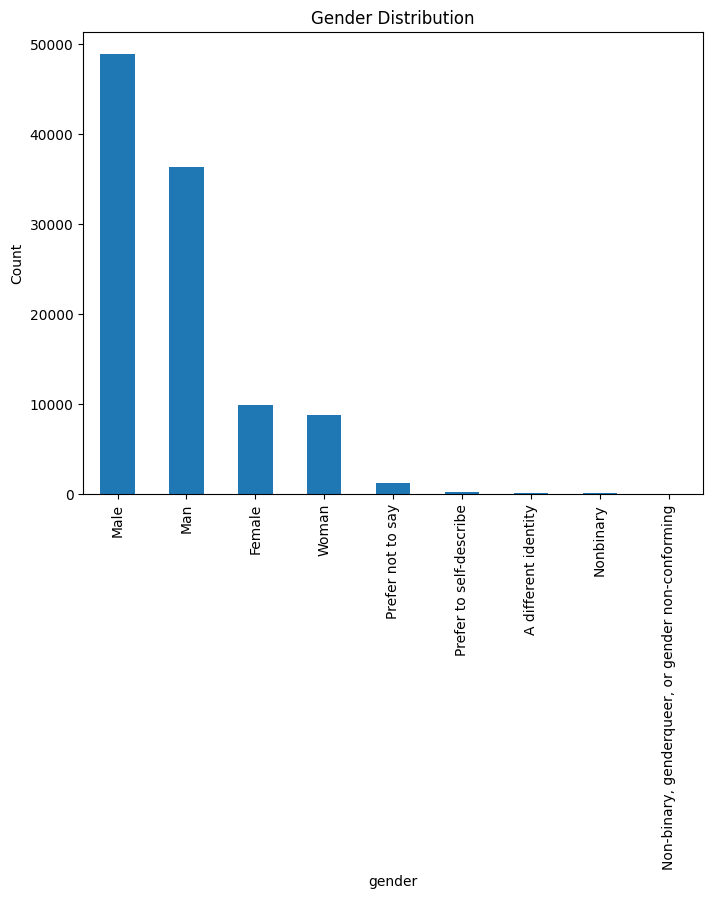

In [7]:
# Gender distribution
gender_counts = df['gender'].value_counts()
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar')
plt.title('Gender Distribution')
plt.ylabel('Count')
plt.show()



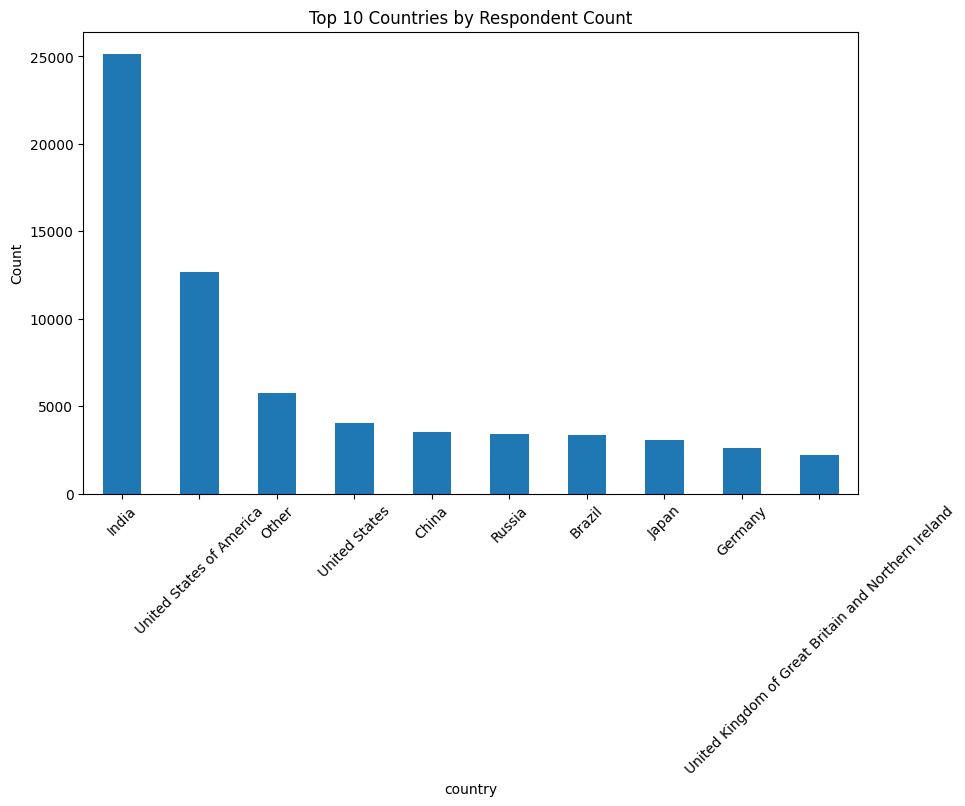

In [8]:
# Top countries
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar')
plt.title('Top 10 Countries by Respondent Count')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()